In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv("train.csv")

In [3]:
train_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,9663
5,Airline E,27/06/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No info,3625
6,Airline A,3/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 04 Jun,22h,2 stops,In-flight meal not included,10919
7,Airline C,24/06/2019,Kolkata,Banglore,CCU → BLR,14:15,16:45,2h 30m,non-stop,No info,5510
8,Airline A,12/06/2019,Delhi,Cochin,DEL → BHO → BOM → COK,05:30,12:35,7h 5m,2 stops,No info,14441
9,Airline G,9/06/2019,Delhi,Cochin,DEL → BLR → COK,16:45,22:25,5h 40m,1 stop,No info,13470


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8012 entries, 0 to 8011
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          8012 non-null   object
 1   Date_of_Journey  8012 non-null   object
 2   Source           8012 non-null   object
 3   Destination      8012 non-null   object
 4   Route            8011 non-null   object
 5   Dep_Time         8012 non-null   object
 6   Arrival_Time     8012 non-null   object
 7   Duration         8012 non-null   object
 8   Total_Stops      8011 non-null   object
 9   Additional_Info  8012 non-null   object
 10  Price            8012 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 688.7+ KB


In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

observations:

1. From description we can see that Date_of_Journey is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

2. For this we require pandas to_datetime to convert object data type to datetime dtype.

3. .dt.day method will extract only day of that date\ *.dt.month method will extract only month of that date

4. Dep_Time , Arrival_Time, Duration  are also in time , so it should be converted to time format from object type.

5. Route , Total_Stops are having 1 null values, It will be filled up/dropped in further analysis.

6. Lets go for EDA.

# EDA

1. Date_of_Journey is a object data type will be converted into numerics as day of journey and Month column is sepately created.

In [6]:
train_data['Journey_Day']= pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
# It will extract date of journey

In [7]:
train_data['month']=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.month
# It will extract month of journey

Let us check whether new columns are added in month and journey_day format or not

In [8]:
train_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,month
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480,12,6
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016,18,6
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879,18,5
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663,6,5
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,9663,9,5


In [9]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

Departure time is when a plane leaves the gate. We can extract the hours and the minutes 

In [10]:
# Extracting hours
train_data['Dep_hrs']=pd.to_datetime(train_data.Dep_Time).dt.hour

In [11]:
#Extracting minutes
train_data['Dep_mnts']=pd.to_datetime(train_data.Dep_Time).dt.minute

In [12]:
# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

Arrival time is when the plane pulls up to the gate.We can extract the hours and the minutes like the above one

In [13]:
train_data['Arrivl_hrs']=pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data['Arrival_mnts']=pd.to_datetime(train_data.Arrival_Time).dt.minute

In [14]:
# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

Duration
1. Time taken by plane to reach destination is called Duration
2. It is the differnce betwwen Departure Time and Arrival time
3. Assigning and converting Duration column into list

In [15]:
duration= list(train_data["Duration"])


for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [16]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [17]:
#Dropping the duration column which is of no use now
train_data.drop('Duration',axis=1,inplace=True)

In [18]:
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,month,Dep_hrs,Dep_mnts,Arrivl_hrs,Arrival_mnts,Duration_hours,Duration_mins
0,Airline C,Delhi,Cochin,DEL → MAA → COK,1 stop,No info,7480,12,6,20,40,9,25,12,45
1,Airline A,Banglore,Delhi,BLR → DEL,non-stop,No info,8016,18,6,18,55,22,0,3,5


Handling missing values
1. As Route and Total_stops are having 1 ,1 missing values respectively.
2. Route and Total_stops are related to each other. we will drop the Route column.
3. here i will drop those columns which has missing values

In [19]:
train_data.dropna(inplace=True) # dropping that row which has missing values.

In [20]:
train_data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
month              0
Dep_hrs            0
Dep_mnts           0
Arrivl_hrs         0
Arrival_mnts       0
Duration_hours     0
Duration_mins      0
dtype: int64

In [21]:
train_data.drop('Route',axis=1,inplace=True)

In [22]:
train_data.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,month,Dep_hrs,Dep_mnts,Arrivl_hrs,Arrival_mnts,Duration_hours,Duration_mins
0,Airline C,Delhi,Cochin,1 stop,No info,7480,12,6,20,40,9,25,12,45
1,Airline A,Banglore,Delhi,non-stop,No info,8016,18,6,18,55,22,0,3,5


In [23]:
train_data['Additional_Info'].value_counts()## looking into Additional_Info feature

No info                         6250
In-flight meal not included     1492
No check-in baggage included     249
1 Long layover                     9
Business class                     3
No Info                            3
Change airports                    2
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [24]:
# Around 80% of data of Additional_Info is saying No-info. That means it has nothing to report,does not show any relevance with prediction. so i will drop it.
train_data.drop('Additional_Info',axis=1,inplace=True)

In [25]:
train_data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,month,Dep_hrs,Dep_mnts,Arrivl_hrs,Arrival_mnts,Duration_hours,Duration_mins
0,Airline C,Delhi,Cochin,1 stop,7480,12,6,20,40,9,25,12,45
1,Airline A,Banglore,Delhi,non-stop,8016,18,6,18,55,22,0,3,5


# Handling The categorical Data.

Numerical data are useful for model building and prediction. So, we need to change categorical features to numerical one by either ONE-HOT-ENCODING OR LABEL-Encoding.

1. When data is ordinal(which  follow any order) is preffered for Label-Encoding.
      Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them.
      
2. When data is nominal(which don't follow any order ) is preffered for One-Hot-Encoding.
      The above  ordering issue is addressed in another common alternative approach called ‘One-Hot Encoding’. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column

In [26]:
# 1.Airline
train_data['Airline'].value_counts()

Airline A    2881
Airline B    1550
Airline C    1286
Airline D     906
Airline E     625
Airline F     360
Airline G     235
Airline H     146
Airline I      12
Airline J       6
Airline K       3
Airline L       1
Name: Airline, dtype: int64

# what is the relation between Airline vs price.?

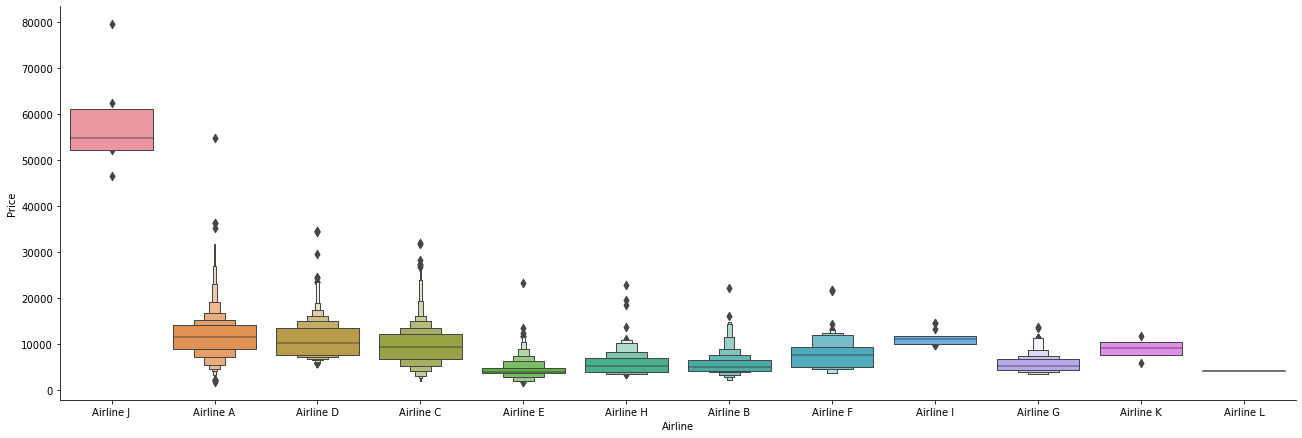

In [27]:
#plt.figure(figsize=(15, 20))
sns.catplot(x='Airline',y='Price',kind="boxen",
            data=train_data.sort_values("Price",ascending=False),height = 6, aspect = 3)
plt.show()

observation:

    1. Airline j is a high price aeroplane.
    2. Airline A,D,C has nearly same price range.
    3. maximum price range of flights come within 0-10000         
                     

In [28]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= False) # pd.get_dummies creates a new dataframe which consists of zeros and ones.

Airline.head()

,Airline_Airline A,Airline_Airline B,Airline_Airline C,Airline_Airline D,Airline_Airline E,Airline_Airline F,Airline_Airline G,Airline_Airline H,Airline_Airline I,Airline_Airline J,Airline_Airline K,Airline_Airline L
0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [29]:
Airline.drop(["Airline_Airline J"],axis=1,inplace=True)
Airline.drop(["Airline_Airline K"],axis=1,inplace=True)
Airline.drop(["Airline_Airline L"],axis=1,inplace=True)


In [30]:
#2.source
train_data['Source'].value_counts()

Delhi       3397
Kolkata     2152
Banglore    1650
Mumbai       523
Chennai      289
Name: Source, dtype: int64

# which source has the highest price ?

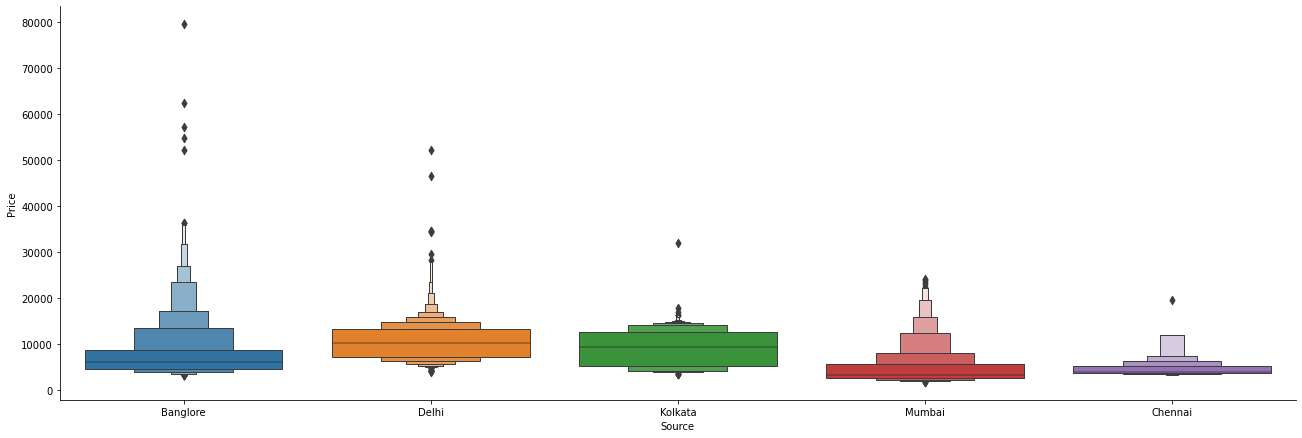

In [31]:

sns.catplot(x='Source',y='Price',kind="boxen",
            data=train_data.sort_values("Price",ascending=False),height = 6, aspect = 3)
plt.show()

observation:

    1. Airline source location Banglore  has highest price range, which has many outlier also.
    2. Delhi and Kolkata source has nearly same price range.
    3. Chennai source has comparatively low price.

In [32]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source= train_data[['Source']]
Source= pd.get_dummies(Source,drop_first=False)
Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [33]:
#3.Destination
train_data['Destination'].value_counts()

Cochin       3397
Banglore     2152
Delhi         956
New Delhi     694
Hyderabad     523
Kolkata       289
Name: Destination, dtype: int64

In [34]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination= train_data[['Destination']]
Destination= pd.get_dummies(Destination,drop_first=False)
Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


# How total_ no_stops is affecting price

In [35]:
train_data['Total_Stops'].value_counts()

1 stop      4235
non-stop    2630
2 stops     1112
3 stops       34
Name: Total_Stops, dtype: int64

In [36]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

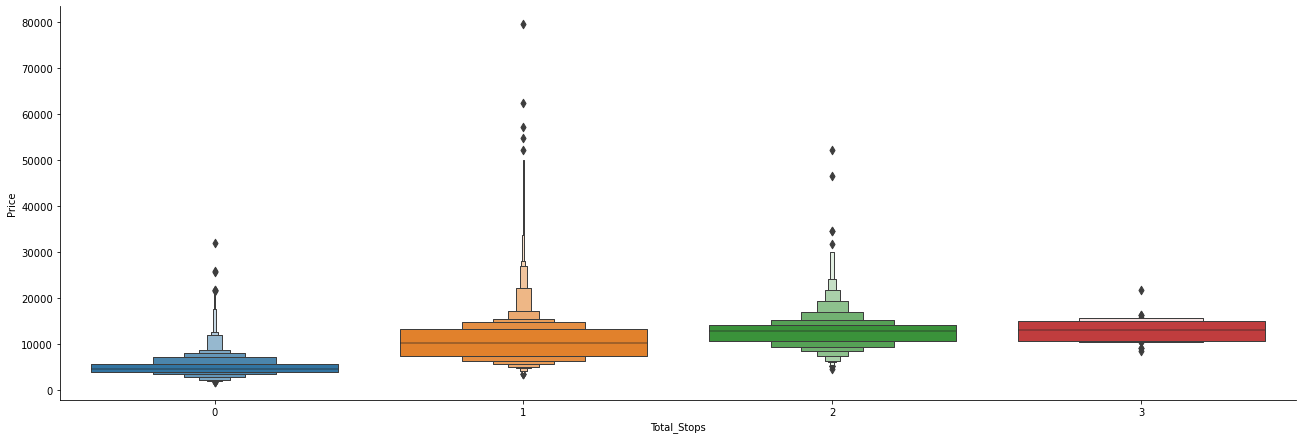

In [37]:
sns.catplot(x='Total_Stops',y='Price',kind="boxen",
            data=train_data.sort_values("Price",ascending=False),height = 6, aspect = 3)
plt.show()

observations:

    1. Here non-stop flights are in the less price range.
    2. Flights having 2/3 stops are in high price range.

In [38]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [39]:
data_train.head(5)

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,month,Dep_hrs,Dep_mnts,Arrivl_hrs,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Airline C,Delhi,Cochin,1,7480,12,6,20,40,9,...,0,1,0,0,0,1,0,0,0,0
1,Airline A,Banglore,Delhi,0,8016,18,6,18,55,22,...,0,0,0,0,0,0,1,0,0,0
2,Airline C,Delhi,Cochin,1,8879,18,5,3,50,19,...,0,1,0,0,0,1,0,0,0,0
3,Airline A,Kolkata,Banglore,1,9663,6,5,20,0,8,...,0,0,1,0,1,0,0,0,0,0
4,Airline A,Kolkata,Banglore,1,9663,9,5,6,30,12,...,0,0,1,0,1,0,0,0,0,0


In [40]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True) ## As these columns are of no use now

In [41]:
data_train.head(3)

,Total_Stops,Price,Journey_Day,month,Dep_hrs,Dep_mnts,Arrivl_hrs,Arrival_mnts,Duration_hours,Duration_mins,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,7480,12,6,20,40,9,25,12,45,...,0,1,0,0,0,1,0,0,0,0
1,0,8016,18,6,18,55,22,0,3,5,...,0,0,0,0,0,0,1,0,0,0
2,1,8879,18,5,3,50,19,15,15,25,...,0,1,0,0,0,1,0,0,0,0


In [42]:
data_train.shape

(8011, 30)

In [43]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'month', 'Dep_hrs', 'Dep_mnts',
       'Arrivl_hrs', 'Arrival_mnts', 'Duration_hours', 'Duration_mins',
       'Airline_Airline A', 'Airline_Airline B', 'Airline_Airline C',
       'Airline_Airline D', 'Airline_Airline E', 'Airline_Airline F',
       'Airline_Airline G', 'Airline_Airline H', 'Airline_Airline I',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [44]:
X= data_train.loc[:,data_train.columns!='Price']

In [45]:
X.head(2)

,Total_Stops,Journey_Day,month,Dep_hrs,Dep_mnts,Arrivl_hrs,Arrival_mnts,Duration_hours,Duration_mins,Airline_Airline A,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,12,6,20,40,9,25,12,45,0,...,0,1,0,0,0,1,0,0,0,0
1,0,18,6,18,55,22,0,3,5,1,...,0,0,0,0,0,0,1,0,0,0


In [46]:
y= data_train.loc[:,'Price']


# Feature selection

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1. heatmap

2. featureimportance

3. SelectKBest

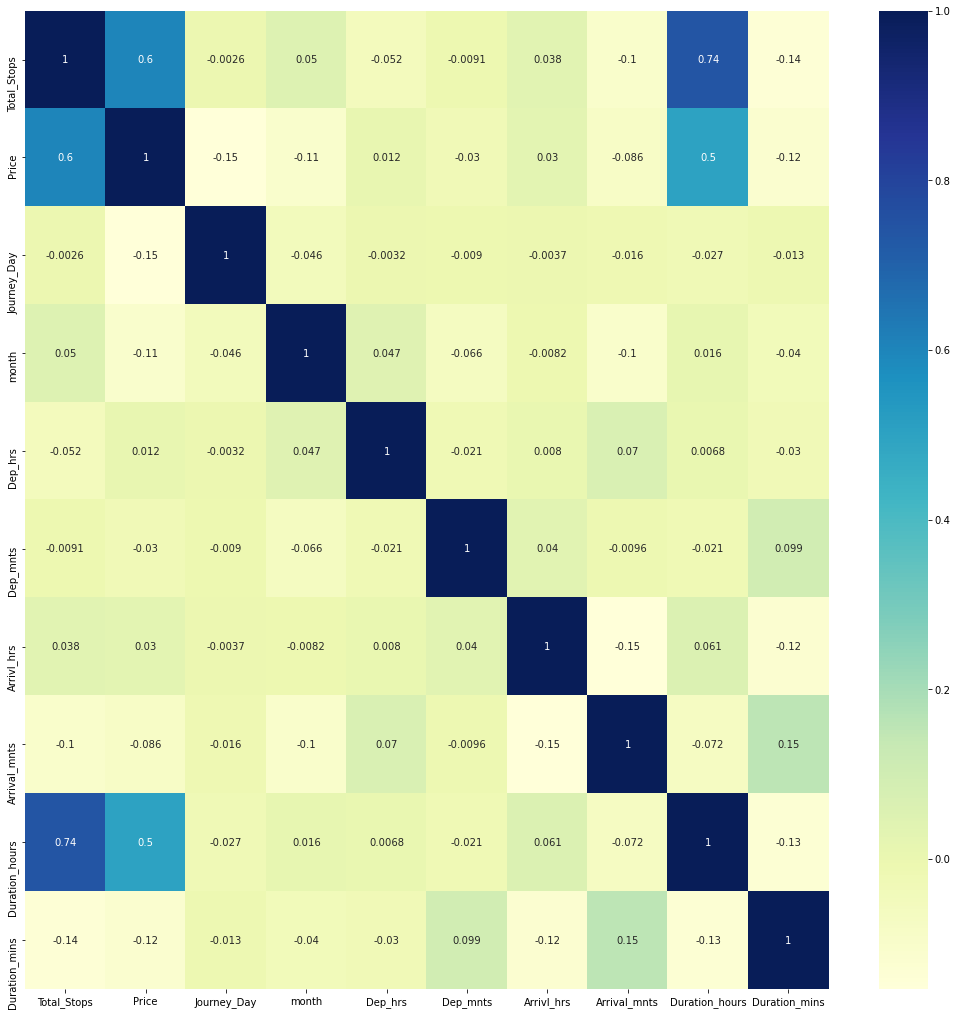

In [47]:
## using heatmap
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [48]:
# lets try using Extra Tree Regressor.
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [49]:
print(selection.feature_importances_)

[0.22673819 0.16126194 0.0540186  0.03104134 0.02677177 0.03214224
 0.02303231 0.123515   0.01912995 0.13330556 0.02736492 0.02158804
 0.01845348 0.00389169 0.00782271 0.00215477 0.00185443 0.00075822
 0.01105394 0.00036471 0.00946872 0.00246658 0.00680688 0.00272007
 0.00924341 0.01663192 0.00627231 0.0004197  0.01970662]


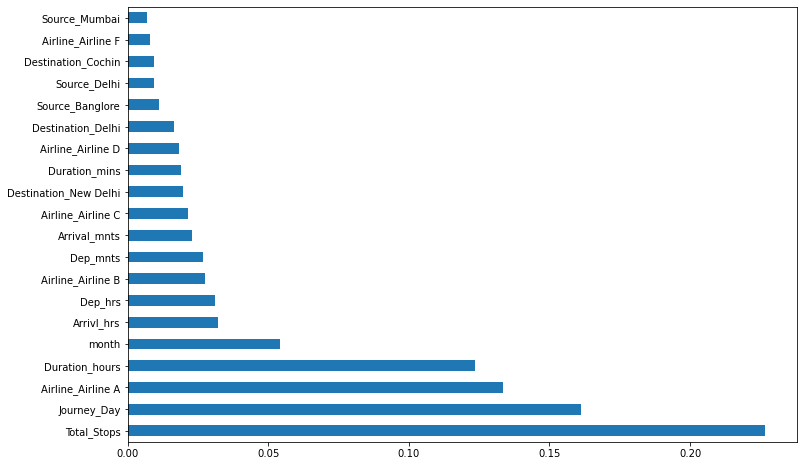

In [50]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


# Train_Test_split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
#We are splitting the data in to two parts one is used to train the model and another is used to validate the model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state = 42)

# Build a baseline Model

In [53]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [54]:
lr = LinearRegression()
ls = Lasso()


In [55]:
# Loop over models and calculate RMSE

models = [('Linear Regression', lr), ('Lasso', ls)]
for m in models:
    model = m[1]
    name = m[0]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"RMSE for {name}")
    #print(round(np.sqrt(mean_squared_error(y_test, y_pred)), 4))
    
    print(-np.sqrt(np.square(np.log10(y_pred+1)-np.log10(y_test+1)).mean()))

RMSE for Linear Regression
-0.12745024220698686
RMSE for Lasso
-0.12744086553235465


In [56]:
#Fitting  Model in  Random Forest Regression
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [57]:
y_pred = reg_rf.predict(X_test)

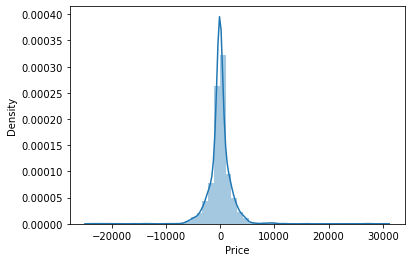

In [58]:
sns.distplot(y_test-y_pred)
plt.show()

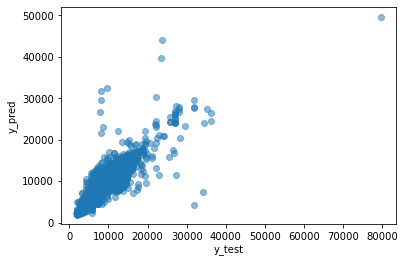

In [59]:
plt.scatter(y_test, y_pred, alpha = 0.5) # The alpha blending value, between 0 (transparent) and 1 (opaque).
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [60]:
print('RMSE of rf_reg:',-np.sqrt(np.square(np.log10(y_pred+1)-np.log10(y_test+1)).mean()))

RMSE of rf_reg: -0.085504286787392


In [61]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.7733635893669931

# Hyperparameter Tuning 

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [64]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [65]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [66]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [67]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [68]:
prediction = rf_random.predict(X_test)

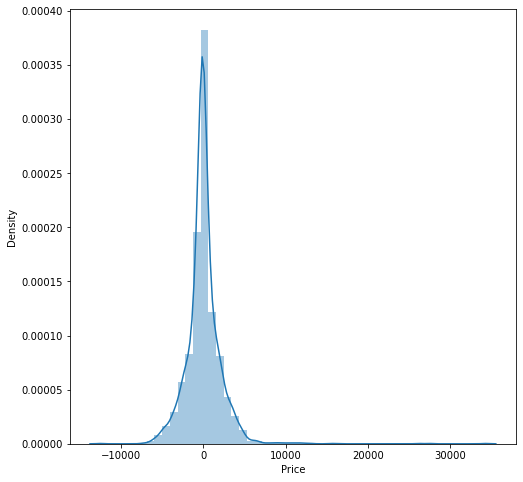

In [69]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

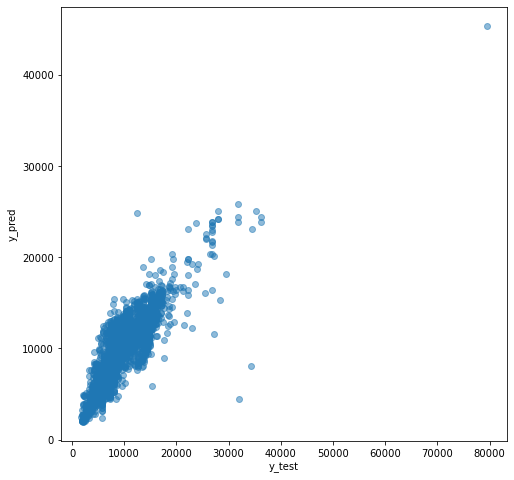

In [70]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [71]:
print('RMSE of rf_random:',-np.sqrt(np.square(np.log10(prediction + 1)-np.log10(y_test+1)).mean()))

RMSE of rf_random: -0.0879089771336004


# PreProcessing of Test Data

In [72]:
test_data= pd.read_csv('test.csv')

In [73]:
test_data.isnull().sum()# no Null values.

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [74]:
test_data['Journey_Day']= pd.to_datetime(test_data.Date_of_Journey, format="%d-%m-%Y").dt.day
# It will extract date of journey
test_data['month']=pd.to_datetime(test_data.Date_of_Journey,format="%d-%m-%Y").dt.month
# It will extract month of journey



In [75]:
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [76]:
# Extracting hours
test_data['Dep_hrs']=pd.to_datetime(test_data.Dep_Time).dt.hour
#Extracting minutes
test_data['Dep_mnts']=pd.to_datetime(test_data.Dep_Time).dt.minute

In [77]:
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [78]:
test_data['Arrivl_hrs']=pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data['Arrival_mnts']=pd.to_datetime(test_data.Arrival_Time).dt.minute

In [79]:
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [80]:
duration= list(test_data["Duration"])


for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [81]:
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins

In [82]:
test_data.drop('Duration',axis=1,inplace=True)

In [83]:
test_data.drop('Additional_Info',axis=1,inplace=True)

In [84]:
test_data.drop('Route',axis=1,inplace=True)

In [85]:
test_data['Airline'].value_counts()

Airline A    968
Airline B    503
Airline C    465
Airline D    290
Airline E    193
Airline F    119
Airline G     84
Airline H     48
Airline I      1
Name: Airline, dtype: int64

In [86]:
Airline = test_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= False) # pd.get_dummies creates a new dataframe which consists of zeros and one
Airline.head()

,Airline_Airline A,Airline_Airline B,Airline_Airline C,Airline_Airline D,Airline_Airline E,Airline_Airline F,Airline_Airline G,Airline_Airline H,Airline_Airline I
0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


In [87]:
Source= test_data[['Source']]
Source= pd.get_dummies(Source,drop_first=False)


In [88]:
Destination= test_data[['Destination']]
Destination= pd.get_dummies(Destination,drop_first=False)


In [89]:
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [90]:
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

In [91]:
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True) ## As these columns are of no use now

In [92]:
data_test.columns

Index(['Total_Stops', 'Journey_Day', 'month', 'Dep_hrs', 'Dep_mnts',
       'Arrivl_hrs', 'Arrival_mnts', 'Duration_hours', 'Duration_mins',
       'Airline_Airline A', 'Airline_Airline B', 'Airline_Airline C',
       'Airline_Airline D', 'Airline_Airline E', 'Airline_Airline F',
       'Airline_Airline G', 'Airline_Airline H', 'Airline_Airline I',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [93]:
data_test.shape

(2671, 29)

In [96]:
#making prediction on test data using randomized search cv
final_prediction= rf_random.predict(data_test[:2671])

In [98]:
print('RMSE of rf_random_test:',-np.sqrt(np.square(np.log10(final_prediction[:2671] + 1)-np.log10(y_test[:2671]+1)).mean()))

RMSE of rf_random_test: -0.3122492795078515


In [113]:
# storing the predictions
prediction = pd.DataFrame(final_prediction,columns=['Price'])



In [100]:
# reading the submission file with client ids
submission = pd.read_csv('sample_submission.csv')
submission.head(5)

,Price
0,0
1,0
2,0
3,0
4,0


In [110]:
final_submission = pd.DataFrame(prediction)

In [111]:
final_submission.head(10)

,Price
0,6545.522000
1,3880.972357
2,11626.830483
3,15037.052443
4,6698.554333
5,12525.361905
6,6416.330873
7,9518.580000
8,12286.700911
9,7783.516750


In [112]:
final_submission.to_csv('submission.csv', index=False) # File ready for submission i.e submission.csv